In [1]:
import os
import pandas as pd
import torch 
from sklearn.linear_model import LinearRegression

from cross_modal_distillation.build import build_module, build_config, build_dataloader
from cross_modal_distillation.models.model import Model

### MS-LFP model

Let's first create the dataset we used to train MS-LFP model, and perform inference. 

To create the dataset, we follow:

1. Generating 10s datasets. During our design and experimentation process, we started from 10s segments and created 5s segments from these segments to ensure same train/val/test splits across different segment lenghts.
2. Generating 5s datasets from 10s datasets. 

Now, let's load the fine-tuned MS-LFP checkpoint provided under `checkpoints` folder, and check the decoding performance of the extracted embeddings. 

In [2]:
# Sessions for which the generalization will be demonstrated (with the distilled model on MonkeyI_20160622_01)  
test_on_subject_session_monkeyI = [
    "MonkeyI_20160624_03",
    "MonkeyI_20160627_01",
    "MonkeyI_20160916_01",
    "MonkeyI_20160921_01",
    "MonkeyI_20160927_04",
    "MonkeyI_20160927_06",
    "MonkeyI_20160930_02",
    "MonkeyI_20160930_05",
    "MonkeyI_20161005_06",
    "MonkeyI_20161006_02",
    "MonkeyI_20161007_02",
    "MonkeyI_20161011_03",
    "MonkeyI_20161014_04",
    "MonkeyI_20161017_02",
    "MonkeyI_20161024_03",
    "MonkeyI_20161025_04",
    "MonkeyI_20161026_03",
    "MonkeyI_20161027_03",
]
test_on_subject_session_monkeyC = [
    "MonkeyC_e2_1",
    "MonkeyC_e2_2",
    "MonkeyC_e3_1",
    "MonkeyC_e3_2",
    "MonkeyC_e3_3",
    "MonkeyC_e3_4",
    "MonkeyC_e4_2",
    "MonkeyC_e4_3",
    "MonkeyC_e5_1",
]

# Build the 10s dataset
ms_lfp_10s_config = build_config(config_name="ms_lfp_10s")
ms_lfp_10s_dataset = build_module(config=ms_lfp_10s_config)

# Build the 5s dataset from 10s dataset
ms_lfp_5s_config = build_config(config_name="ms_lfp")
ms_lfp_5s_dataset = build_module(config=ms_lfp_5s_config)

ms_lfp_5s_dataset.reduce_metadata(
    subject_sessions=test_on_subject_session_monkeyI + test_on_subject_session_monkeyC,
)

# And now, build and load the MS-LFP model trained on 34 recording sessions and save the embeddings   
ms_lfp = Model(
    ckpt_path="./checkpoints/ms_lfp.ckpt",
    ckpt_metadata_path="./checkpoints/ms_lfp_metadata.csv", 
)
ms_lfp_5s_dataloader = build_dataloader(
    dataset=ms_lfp_5s_dataset,
    collate_fn_name="collate_with_metadata_fn",
    batch_size=64,
)
ms_lfp.get_embeddings(
    ms_lfp_5s_dataloader,
    save_embeddings=True,
    save_dir="./results/ms_lfp_embeddings",
)


/home/eerturk/miniconda3/envs/testenv/lib/python3.9/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'ms_lfp_10s': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)
2025-11-26 10:25:36,799  [MultiSessionDataset]      INFO | Building makin_rt dataset with module cross_modal_distillation.data.makin_dataset.MakinRTDataset.
2025-11-26 10:25:36,803  [MakinRTDataset]     DEBUG | Raw data downloaded indicator file path: ./results/data/MakinRT/raw/download_complete.done
2025-11-26 10:25:36,803  [MakinRTDataset]      INFO | Raw dataset is downloaded.
2025-11-26 10:25:36,806  [MakinRTDataset]      INFO | Processed raw data exists (i.e., LFPs are extracted.)
2025-11-26 10:25:36,855  [MakinRTDataset]      INFO | Processed segments exists (with processing string 'delta10ms_d_lfp999_segment_length10_val_ratio1.0e-01_test_ratio1.0e-01_zScLFP_zScKinem_LFP_lpCut5.0e+01H

Loading metadata from ./results/data/MakinRT/metadata_e9536.csv...
Loading metadata from ./results/data/FlintCO/metadata_e9536.csv...
Loading metadata from ./results/data/MakinRT/metadata_3a4b4.csv...


2025-11-26 10:25:37,049  [MakinRTDataset]      INFO | Processed segments exists (with processing string 'delta10ms_d_lfp999_segment_length5_val_ratio1.0e-01_test_ratio1.0e-01_zScLFP_zScKinem_LFP_lpCut5.0e+01Hz_hpCut5.0e-02Hz_from_segment_length10 and hash 3a4b4').
2025-11-26 10:25:37,050  [MultiSessionDataset]      INFO | Building flint_co dataset with module cross_modal_distillation.data.flint_dataset.FlintCODataset.
2025-11-26 10:25:37,055  [FlintCODataset]      INFO | Raw dataset is downloaded.
2025-11-26 10:25:37,056  [FlintCODataset]      INFO | Processed raw data exists (i.e., LFPs are extracted.)
2025-11-26 10:25:37,069  [FlintCODataset]      INFO | Processed segments exists (with processing string 'delta10ms_d_lfp999_segment_length5_val_ratio1.0e-01_test_ratio1.0e-01_zScLFP_zScKinem_LFP_lpCut5.0e+01Hz_hpCut5.0e-02Hz_from_segment_length10 and hash 3a4b4').
/home/eerturk/cross_modal_distillation/cross_modal_distillation/models/model.py:41: FutureWarning: You are using `torch.load

Loading metadata from ./results/data/FlintCO/metadata_3a4b4.csv...
Loading metadata from ./checkpoints/ms_lfp_metadata.csv...


/home/eerturk/miniconda3/envs/testenv/lib/python3.9/site-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/home/eerturk/miniconda3/envs/testenv/lib/python3.9/site-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")
2025-11-26 10:25:50,662  [Model]      INFO | Model components initialized successfully
2025-11-26 10:25:50,671  [Model]      INFO | Model components loaded successfully
Batch 52/52: 100%|██████████| 52/52 [01:55<00:00,  2.22s/batch]
2025-11-26 10:27:50,139  [Model]      INFO | Saving extracted emb

In [3]:
def decode_kinem(embedding_dir, metadata_paths, subject_sessions, return_embeddings_kinem=False):
    if isinstance(metadata_paths, str):
        metadata_paths = [metadata_paths]

    if isinstance(subject_sessions, str):
        subject_sessions = [subject_sessions]
    
    metadata = [pd.read_csv(i) for i in metadata_paths]
    metadata = pd.concat(metadata)

    train_scores, test_scores = [], []

    for ss in subject_sessions:
        indices = metadata['subject_session'] == ss
        metadata_ss = metadata[indices].reset_index(drop=True)
        
        train_kinem, train_embeddings = [], []
        val_kinem, val_embeddings = [], []
        test_kinem, test_embeddings = [], []

        for _, meta_row in metadata_ss.iterrows():
            # load the data and embeddings
            data = torch.load(meta_row.path, weights_only=True)
            emb = torch.load(os.path.join(embedding_dir, meta_row.segment_filename), weights_only=True)
            
            if meta_row.split == 'train':
                train_kinem.append(data['kinem'])
                train_embeddings.append(emb.reshape(-1, emb.shape[-1]))
            elif meta_row.split == 'val':
                val_kinem.append(data['kinem'])
                val_embeddings.append(emb.reshape(-1, emb.shape[-1]))
            else:
                test_kinem.append(data['kinem'])
                test_embeddings.append(emb.reshape(-1, emb.shape[-1]))
        
        train_kinem = torch.cat(train_kinem)
        train_embeddings = torch.cat(train_embeddings)
        
        # Combine test and val for more accurate statistics
        test_kinem.extend(val_kinem)
        test_embeddings.extend(val_embeddings)

        test_kinem = torch.cat(test_kinem)
        test_embeddings = torch.cat(test_embeddings)

        # Fit LR
        lr = LinearRegression()
        lr.fit(train_embeddings, train_kinem)

        train_score = lr.score(train_embeddings, train_kinem)
        test_score = lr.score(test_embeddings, test_kinem)
        
        print(f"Subject-session: {ss}, train LR R2 score: {train_score}")
        print(f"Subject-session: {ss}, val-test LR R2 score: {test_score}")

        train_scores.append(train_score)
        test_scores.append(test_score)

    if return_embeddings_kinem:
        return train_scores, test_scores, train_embeddings, train_kinem, test_embeddings, test_kinem    
    return train_scores, test_scores


Now, let's check the decoding performance of the MS-LFP model fine-tuned on Monkey I's 20160622_01 recording session.

In [4]:
# Decode the kinematics (cursor velocity for MonkeyI)
_, ms_lfp_scores = decode_kinem(embedding_dir='./results/ms_lfp_embeddings', 
                                metadata_paths=['./results/data/MakinRT/metadata_3a4b4.csv', './results/data/FlintCO/metadata_3a4b4.csv'], 
                                subject_sessions=test_on_subject_session_monkeyI + test_on_subject_session_monkeyC)

Subject-session: MonkeyI_20160624_03, train LR R2 score: 0.3986764168801216
Subject-session: MonkeyI_20160624_03, val-test LR R2 score: 0.39291257696255544
Subject-session: MonkeyI_20160627_01, train LR R2 score: 0.3684980172758044
Subject-session: MonkeyI_20160627_01, val-test LR R2 score: 0.359992315358625
Subject-session: MonkeyI_20160916_01, train LR R2 score: 0.3835497875372626
Subject-session: MonkeyI_20160916_01, val-test LR R2 score: 0.3017948347303205
Subject-session: MonkeyI_20160921_01, train LR R2 score: 0.36573510983295654
Subject-session: MonkeyI_20160921_01, val-test LR R2 score: 0.34084350834212546
Subject-session: MonkeyI_20160927_04, train LR R2 score: 0.4450597012439801
Subject-session: MonkeyI_20160927_04, val-test LR R2 score: 0.3515270138971933
Subject-session: MonkeyI_20160927_06, train LR R2 score: 0.4354395958329027
Subject-session: MonkeyI_20160927_06, val-test LR R2 score: 0.35531631394494967
Subject-session: MonkeyI_20160930_02, train LR R2 score: 0.38837641

### Distilled LFP models

Under `checkpoints` directory, we provide the 2 Distilled LFP models where the cross-modal knowledge distillation was performed on `Monkey I`'s and `Monkey C`'s recording sessions of `20160622_01` and `e1_1`, respectively. 

Now, let's load the Distilled LFP models for `Monkey I - 20160622_01` and `Monkey C - e1_1` separately and get embeddings.

Note that the recording sessions used for the generalization analysis below were completely unseen for the distilled models, which were also excluded from teacher spike model's pretraining.

In [5]:
from copy import deepcopy 

# Build the 5s dataset. Note that we don't need to generate 5s data again, it was already generated when testing MS-LFP's performance.
distilled_lfp_5s_config = build_config(config_name="distilled_lfp")
distilled_lfp_5s_dataset = build_module(config=distilled_lfp_5s_config)

# And now, build and load the Distilled LFP model trained on Monkey I - 20160622_01 and Monkey C - e1_1
distilled_lfp_monkeyI_20160622_01 = Model(
    ckpt_path="./checkpoints/distilled_lfp_monkeyI_20160622_01.ckpt",
    ckpt_metadata_path="./checkpoints/distilled_lfp_monkeyI_20160622_01_metadata.csv", 
)
distilled_lfp_monkeyC_e1_1 = Model(
    ckpt_path="./checkpoints/distilled_lfp_monkeyC_e1_1.ckpt",
    ckpt_metadata_path="./checkpoints/distilled_lfp_monkeyC_e1_1_metadata.csv", 
)

# Now, perform inference on Monkey I's recording sessions
for trained_on_ss, tested_on_ss, model in zip(['MonkeyI_20160622_01', 'MonkeyC_e1_1'], 
                                              [test_on_subject_session_monkeyI, test_on_subject_session_monkeyC], 
                                              [distilled_lfp_monkeyI_20160622_01, distilled_lfp_monkeyC_e1_1]):
    for ss in (tested_on_ss):
        print(f'Performing inference for {ss}...')

        # copy the dataset and reduce to session to perform inference on
        distilled_lfp_5s_dataset_reduced = deepcopy(distilled_lfp_5s_dataset)
        distilled_lfp_5s_dataset_reduced.reduce_metadata(
            subject_sessions=ss,
        )

        # The subject_session column of the metadata should match the naming of the tokenizer module's patch embeddings
        # thus, we replace the subject_session of the metadata with subject_session on which the distilled LFP model is trained on
        distilled_lfp_5s_dataset_reduced.metadata._metadata_df['subject_session'] = trained_on_ss
        
        # and perform inference
        distilled_lfp_5s_dataloader_reduced = build_dataloader(
            dataset=distilled_lfp_5s_dataset_reduced,
            collate_fn_name="collate_with_metadata_fn",
            batch_size=64,
        )
        model.get_embeddings(
            distilled_lfp_5s_dataloader_reduced,
            save_embeddings=True,
            save_dir="./results/distilled_lfp_embeddings",
        )

/home/eerturk/miniconda3/envs/testenv/lib/python3.9/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'distilled_lfp': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)
2025-11-26 10:28:14,646  [MultiSessionDataset]      INFO | Building makin_rt dataset with module cross_modal_distillation.data.makin_dataset.MakinRTDataset.
2025-11-26 10:28:14,649  [MakinRTDataset]     DEBUG | Raw data downloaded indicator file path: ./results/data/MakinRT/raw/download_complete.done
2025-11-26 10:28:14,650  [MakinRTDataset]      INFO | Raw dataset is downloaded.
2025-11-26 10:28:14,653  [MakinRTDataset]      INFO | Processed raw data exists (i.e., LFPs are extracted.)


Loading metadata from ./results/data/MakinRT/metadata_3a4b4.csv...


2025-11-26 10:28:14,741  [MakinRTDataset]      INFO | Processed segments exists (with processing string 'delta10ms_d_lfp999_segment_length5_val_ratio1.0e-01_test_ratio1.0e-01_zScLFP_zScKinem_LFP_lpCut5.0e+01Hz_hpCut5.0e-02Hz_from_segment_length10 and hash 3a4b4').
2025-11-26 10:28:14,741  [MultiSessionDataset]      INFO | Building flint_co dataset with module cross_modal_distillation.data.flint_dataset.FlintCODataset.
2025-11-26 10:28:14,747  [FlintCODataset]      INFO | Raw dataset is downloaded.
2025-11-26 10:28:14,749  [FlintCODataset]      INFO | Processed raw data exists (i.e., LFPs are extracted.)
2025-11-26 10:28:14,760  [FlintCODataset]      INFO | Processed segments exists (with processing string 'delta10ms_d_lfp999_segment_length5_val_ratio1.0e-01_test_ratio1.0e-01_zScLFP_zScKinem_LFP_lpCut5.0e+01Hz_hpCut5.0e-02Hz_from_segment_length10 and hash 3a4b4').
/home/eerturk/cross_modal_distillation/cross_modal_distillation/models/model.py:41: FutureWarning: You are using `torch.load

Loading metadata from ./results/data/FlintCO/metadata_3a4b4.csv...
Loading metadata from ./checkpoints/distilled_lfp_monkeyI_20160622_01_metadata.csv...


2025-11-26 10:28:14,887  [Model]      INFO | Model components initialized successfully
2025-11-26 10:28:14,893  [Model]      INFO | Model components loaded successfully


Loading metadata from ./checkpoints/distilled_lfp_monkeyC_e1_1_metadata.csv...


2025-11-26 10:28:15,013  [Model]      INFO | Model components initialized successfully
2025-11-26 10:28:15,023  [Model]      INFO | Model components loaded successfully


Performing inference for MonkeyI_20160624_03...


Batch 2/2: 100%|██████████| 2/2 [00:02<00:00,  1.20s/batch]
2025-11-26 10:28:17,584  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyI_20160627_01...


Batch 11/11: 100%|██████████| 11/11 [00:02<00:00,  5.50batch/s]
2025-11-26 10:28:19,680  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyI_20160916_01...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  5.69batch/s]
2025-11-26 10:28:20,589  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyI_20160921_01...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  8.03batch/s]
2025-11-26 10:28:20,927  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyI_20160927_04...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  9.28batch/s]
2025-11-26 10:28:21,197  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyI_20160927_06...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  9.11batch/s]
2025-11-26 10:28:21,477  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyI_20160930_02...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  8.18batch/s]
2025-11-26 10:28:21,783  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyI_20160930_05...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  9.20batch/s]
2025-11-26 10:28:22,073  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyI_20161005_06...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  8.86batch/s]
2025-11-26 10:28:22,366  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyI_20161006_02...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  7.03batch/s]
2025-11-26 10:28:22,737  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyI_20161007_02...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  7.71batch/s]
2025-11-26 10:28:23,088  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyI_20161011_03...


Batch 3/3: 100%|██████████| 3/3 [00:00<00:00,  8.09batch/s]
2025-11-26 10:28:23,554  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyI_20161014_04...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  7.33batch/s]
2025-11-26 10:28:23,927  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyI_20161017_02...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  7.19batch/s]
2025-11-26 10:28:24,285  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyI_20161024_03...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  7.69batch/s]
2025-11-26 10:28:24,652  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyI_20161025_04...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  7.18batch/s]
2025-11-26 10:28:25,028  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyI_20161026_03...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  7.07batch/s]
2025-11-26 10:28:25,421  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyI_20161027_03...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  6.25batch/s]
2025-11-26 10:28:25,814  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyC_e2_1...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  6.26batch/s]
2025-11-26 10:28:26,225  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyC_e2_2...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  5.66batch/s]
2025-11-26 10:28:26,668  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyC_e3_1...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  5.04batch/s]
2025-11-26 10:28:27,156  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyC_e3_2...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  5.69batch/s]
2025-11-26 10:28:27,598  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyC_e3_3...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  5.86batch/s]
2025-11-26 10:28:28,043  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyC_e3_4...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  5.97batch/s]
2025-11-26 10:28:28,493  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyC_e4_2...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  6.91batch/s]
2025-11-26 10:28:28,868  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyC_e4_3...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  6.66batch/s]
2025-11-26 10:28:29,261  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


Performing inference for MonkeyC_e5_1...


Batch 2/2: 100%|██████████| 2/2 [00:00<00:00,  6.54batch/s]
2025-11-26 10:28:29,659  [Model]      INFO | Saving extracted embeddings at ./results/distilled_lfp_embeddings


After we saved the embeddings for both `Monkey I`'s and `Monkey C`'s recording sessions **(completely unseen for the distilled models)** using the loaded Distilled LFP models, let's perform behavior decoding using the embeddings.

In [6]:
# Decode the kinematics (cursor velocity for MonkeyI)
_, distilled_lfp_scores = decode_kinem(embedding_dir='./results/distilled_lfp_embeddings', 
                                metadata_paths=['./results/data/MakinRT/metadata_3a4b4.csv', './results/data/FlintCO/metadata_3a4b4.csv'], 
                                subject_sessions=test_on_subject_session_monkeyI + test_on_subject_session_monkeyC)

Subject-session: MonkeyI_20160624_03, train LR R2 score: 0.6559610364984532
Subject-session: MonkeyI_20160624_03, val-test LR R2 score: 0.5979468320123386
Subject-session: MonkeyI_20160627_01, train LR R2 score: 0.5663337589516284
Subject-session: MonkeyI_20160627_01, val-test LR R2 score: 0.5387445726526234
Subject-session: MonkeyI_20160916_01, train LR R2 score: 0.6137344554892767
Subject-session: MonkeyI_20160916_01, val-test LR R2 score: 0.5289329299204114
Subject-session: MonkeyI_20160921_01, train LR R2 score: 0.5470123287386555
Subject-session: MonkeyI_20160921_01, val-test LR R2 score: 0.42326324533991194
Subject-session: MonkeyI_20160927_04, train LR R2 score: 0.6209165009755817
Subject-session: MonkeyI_20160927_04, val-test LR R2 score: 0.4823512866738406
Subject-session: MonkeyI_20160927_06, train LR R2 score: 0.6453229767444881
Subject-session: MonkeyI_20160927_06, val-test LR R2 score: 0.5578844028554848
Subject-session: MonkeyI_20160930_02, train LR R2 score: 0.6260334084

At this point, we have the decoding scores for MS-LFP and Distilled LFP models. Let's plot them.

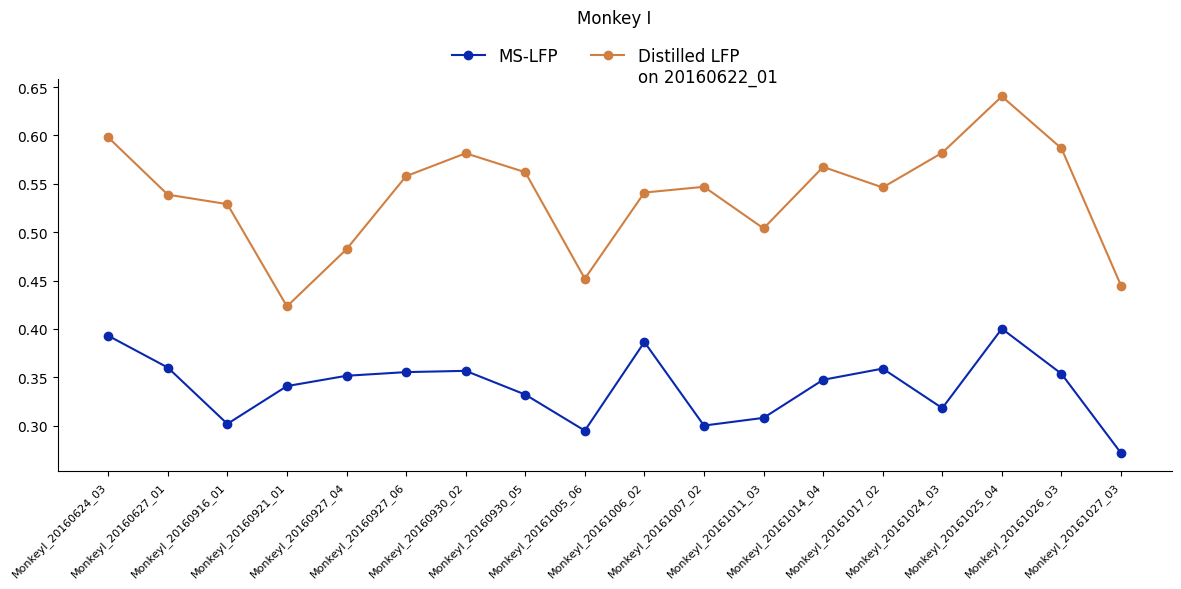

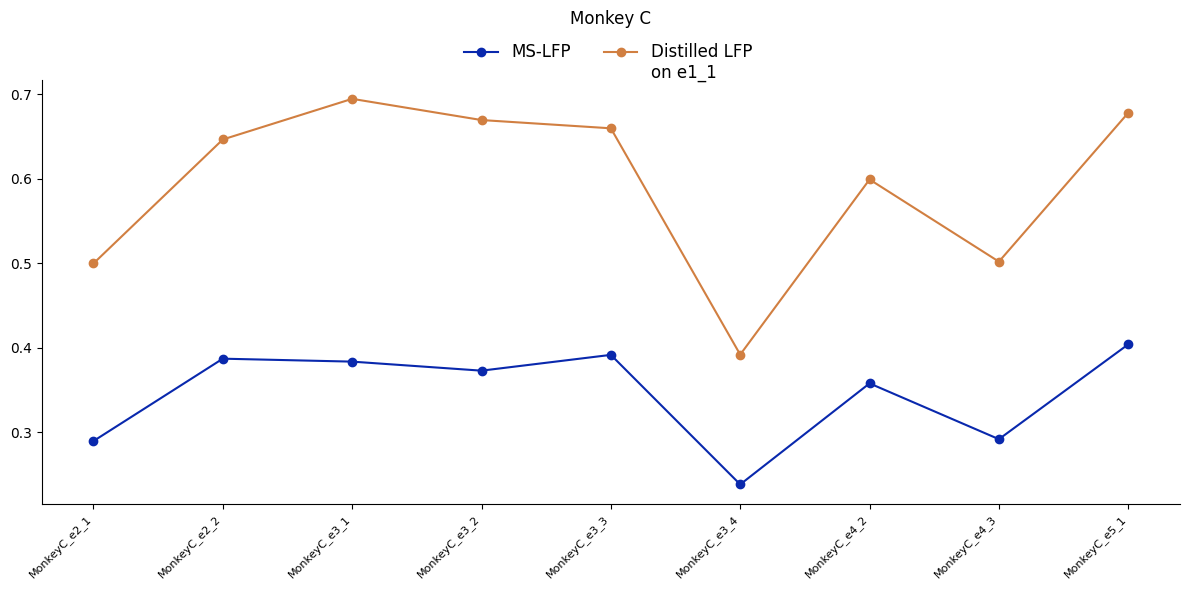

In [ ]:
import matplotlib.pyplot as plt 


def set_plot_nature(ax, title=''):
    ax.tick_params(axis='x', labelrotation=45, labelsize=8)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
    for label in ax.get_xticklabels():
        label.set_ha('right')
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_title(title, pad=40, fontsize=12)
    leg = ax.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, 1.15), 
        ncol=2,
        fontsize=12,
        frameon=False
    )
    for text in leg.get_texts():
        text.set_ha('left') 
        text.set_va('center_baseline')      
        text.set_position((0, 7))

colors = {
    'Distilled LFP': '#d17f41',
    'MS-LFP': '#0928ad',
}

num_sessions_monkeyI = len(test_on_subject_session_monkeyI)

# Plot Monkey I results
fi = plt.figure(figsize=(12, 6))
axi = fi.add_subplot(111)
axi.plot(test_on_subject_session_monkeyI, ms_lfp_scores[:num_sessions_monkeyI], '-o', color=colors['MS-LFP'], label='MS-LFP')
axi.plot(test_on_subject_session_monkeyI, distilled_lfp_scores[:num_sessions_monkeyI], '-o', color=colors['Distilled LFP'], label='Distilled LFP \non 20160622_01')
set_plot_nature(axi, title='Monkey I')
plt.tight_layout()

# Plot Monkey C results
fc = plt.figure(figsize=(12, 6))
axc = fc.add_subplot(111)
axc.plot(test_on_subject_session_monkeyC, ms_lfp_scores[num_sessions_monkeyI:], '-o', color=colors['MS-LFP'], label='MS-LFP')
axc.plot(test_on_subject_session_monkeyC, distilled_lfp_scores[num_sessions_monkeyI:], '-o', color=colors['Distilled LFP'], label='Distilled LFP \non e1_1')
set_plot_nature(axc, title='Monkey C')
plt.tight_layout()

